In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = 'drive/My Drive/DOG&CAT'

train_dir = os.path.join(base_dir, 'Train')


In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2,
        rescale=1./255,
        shear_range=0.2,
        horizontal_flip=True)

train_ds = datagen.flow_from_directory(
  train_dir,
  class_mode='sparse',
  target_size=(224,224),
  batch_size=123,subset="training")

Valid_ds = datagen.flow_from_directory(
  train_dir,
  shuffle=False,
  class_mode='sparse',
  target_size=(224,224),
  batch_size=123,  subset="validation")


Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [ ]:
class_names =[k for k in Valid_ds.class_indices.keys()]
print(class_names)

['CAT', 'DOG']


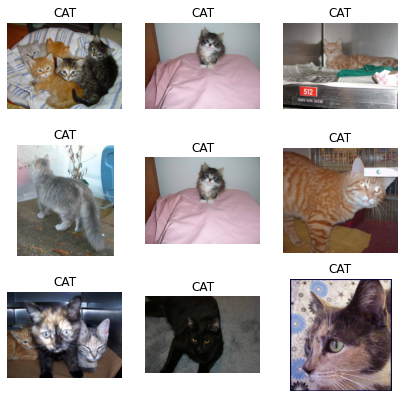

In [ ]:
import random
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
for i in range(9):
  increase=random.randint(1,250)
  ax = plt.subplot(3, 3, i + 1)
  img = plt.imread(Valid_ds.filepaths[i+increase])
  plt.imshow(img)
  plt.title(class_names[Valid_ds.labels[i+increase]],c="black")
  plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(224,
                                                              224,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
model = Sequential([
                    #convlutional layers
                      layers.Conv2D(128, 3, activation='relu',input_shape=(224,224,3)),
                      layers.MaxPooling2D(),
                      layers.Conv2D(64, 3, activation='relu'),
                      layers.MaxPooling2D(),
                      layers.Conv2D(32, 3, activation='relu'),
                      layers.MaxPooling2D(),
                      layers.Flatten(),

                    #dense layer
                      layers.Dense(128, activation='relu'),
                      layers.Dense(64, activation='relu'),
                      layers.Dense(5, activation="softmax")
])

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 21632)            

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

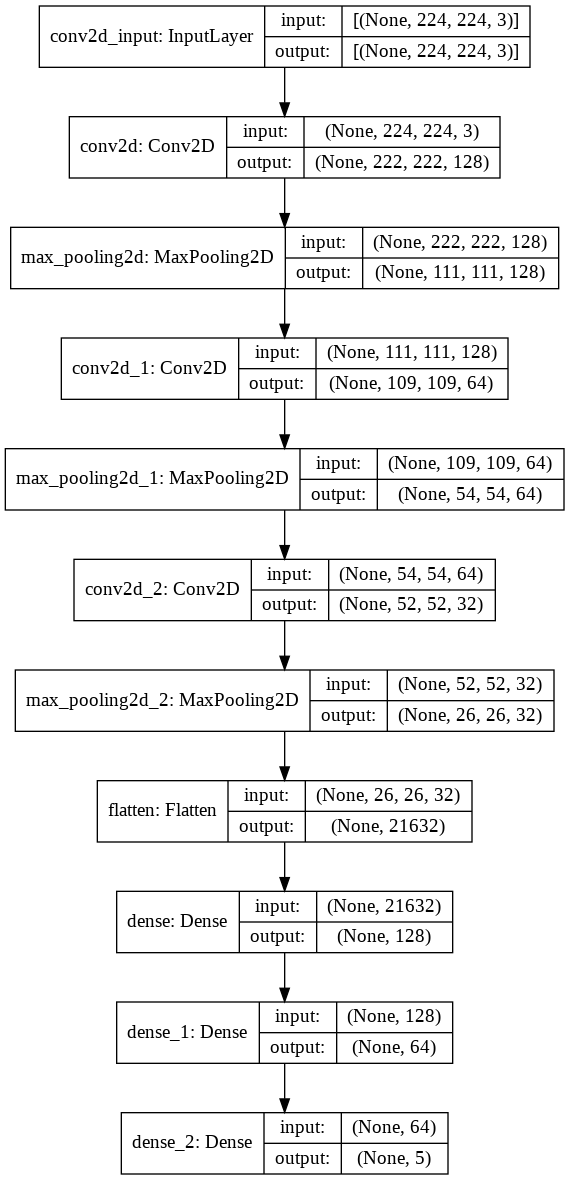

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
history = model.fit(
  train_ds,
  validation_data=Valid_ds,
  epochs=50

)

Epoch 1/50
53/53 [==============================] - 2017s 38s/step - loss: 0.8534 - accuracy: 0.4986 - val_loss: 0.6875 - val_accuracy: 0.5347
Epoch 2/50
53/53 [==============================] - 93s 2s/step - loss: 0.6898 - accuracy: 0.5471 - val_loss: 0.7093 - val_accuracy: 0.5515
Epoch 3/50
53/53 [==============================] - 93s 2s/step - loss: 0.6612 - accuracy: 0.6016 - val_loss: 0.6413 - val_accuracy: 0.6402
Epoch 4/50
53/53 [==============================] - 93s 2s/step - loss: 0.5993 - accuracy: 0.6848 - val_loss: 0.5716 - val_accuracy: 0.7077
Epoch 5/50
53/53 [==============================] - 93s 2s/step - loss: 0.5434 - accuracy: 0.7307 - val_loss: 0.5384 - val_accuracy: 0.7202
Epoch 6/50
53/53 [==============================] - 93s 2s/step - loss: 0.4999 - accuracy: 0.7527 - val_loss: 0.5393 - val_accuracy: 0.7420
Epoch 7/50
53/53 [==============================] - 93s 2s/step - loss: 0.4734 - accuracy: 0.7850 - val_loss: 0.5204 - val_accuracy: 0.7489
Epoch 8/50
53/53 

In [ ]:
model.save('/content/drive/MyDrive/DOG&CAT/saved_model/my_model')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DOG&CAT/saved_model/my_model/assets


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/DOG&CAT/saved_model/my_model')

In [ ]:
new_model.evaluate(Valid_ds)

14/14 [==============================] - 18s 1s/step - loss: 2.0370 - accuracy: 0.7820


[2.0370311737060547, 0.7820112705230713]

Saving dog.8.jpg to dog.8.jpg
[[0. 1. 0. 0. 0.]]
DOG


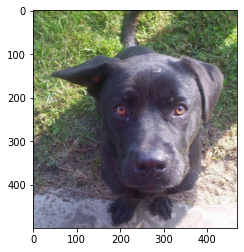

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = new_model.predict(images)
  print(classes)
  print(class_names[classes[0].argmax()])
  img = plt.imread(path)
  plt.imshow(img)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

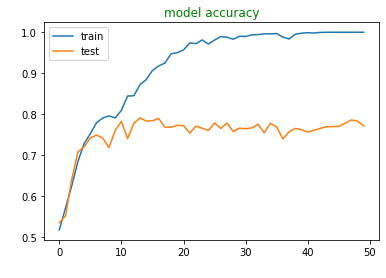

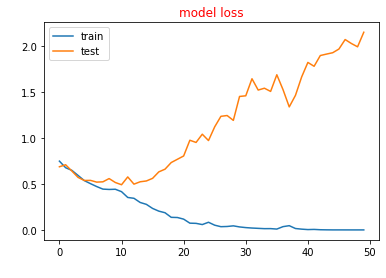

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy', c="green")
plt.ylabel('accuracy', c='white')
plt.xlabel('epoch',c='white')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss', c="red")
plt.ylabel('loss',c='white')
plt.xlabel('epoch',c='white')
plt.legend(['train', 'test'], loc='upper left')
plt.show()